In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
import math
import re
from gurobipy import *

|Estudiante|Código|Correo|
|-----|-----|----|
|Juana Mejía Botero|20221512|j.mejia17|
|Daniela Ricaurte Echeverry|201822966|d.ricaurte|

# Proyecto - Entrega 3


## Lectura de datos

In [ ]:
# Datos globales del grafo
datos_globales = {}

# Nodos del grafo
nodos = []

# Demanda de potencia activa de los nodos
pd = {}
# Demanda de potencia reactiva de los nodos
qd = {}

# Resistencia de los arcos
r = {}
# Reactancia de los arcos
x = {}
# Arcos
B = []

In [3]:

def lecturaDocumentoDB():
    
    #Valores globales    
    patterns = {
        'nref': r'nref\s*=\s*([\d.]+);',
        'vref': r'vref\s*=\s*([\d.]+);',
        'vbase': r'vbase\s*=\s*([\d.]+);',
        'sbase': r'sbase\s*=\s*([\d.]+);',
        'tol': r'tol\s*=\s*([\d.^-]+);', 
        'vmin': r'vmin\s*=\s*([\d.]+);',
        'vmax': r'vmax\s*=\s*([\d.]+);',
        'zbase': r'zbase\s*=\s*([\d.]+);',
    }
    
    branch_pattern = r'ramos\s*=\s*\[(.*?)\];'
    bus_demand_pattern = r'barras\s*=\s*\[(.*?)\];'
    
    branches = []
    bus_demand = []
    
    file_path = "C:\\Users\\danir\\OneDrive - Universidad de los andes\\Flujo de Redes\\Proyecto\\datos14.txt"
    #input('Ingresar el path del archivo \n')
    
    with open(file_path, "r") as file:
        text = file.read()
    

    for key, pattern in patterns.items():
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            if key == 'tol':
                base, exponent = match.group(1).split('^')
                datos_globales[key] = float(base) * 10 ** int(exponent)
            else:
                datos_globales[key] = float(match.group(1))
    
    
    
    # Datos de ramas      
    match = re.search(branch_pattern, text, re.DOTALL)
    if match:
        branch_data = match.group(1)

        
        branch_lines = branch_data.split('\n')
        branch_lines = [line.strip() for line in branch_lines if not line.strip().startswith('%')]

       
        for line in branch_lines:
            valores = line.split()
            if len(valores) == 4:
                branch = [float(valor) for valor in valores]
                branches.append(branch)
                
    # Datos de la demanda de potencia activa y reactiva en las barras
    match = re.search(bus_demand_pattern, text, re.DOTALL)
    if match:
        bus_demand_data = match.group(1)

       
        bus_demand_lines = bus_demand_data.split('\n')
        bus_demand_lines = [line.strip() for line in bus_demand_lines if not line.strip().startswith('%')]

       
        for line in bus_demand_lines:
            valores = line.split()
            if len(valores) >= 4:
                bus = [int(valores[0]), float(valores[1]), float(valores[2]), float(valores[3])]
                bus_demand.append(bus)
    
    # Editar los valores
    numNodos(datos_globales.get("nref"))
    potencias(bus_demand)
    impedencia(branches)
    
    

def numNodos(n):
    for i in range (1,int(n)+1):
        nodos.append(i)
    


def potencias(demand):
    for bus in demand:
        pd[(bus[0])] = bus[1]
        qd[( bus[0])] = bus[2]
      
        
def impedencia(branches): 
    for branch in branches:
        from_node = int(branch[0])
        to_node = int(branch[1])
        
        
        B.append( (from_node, to_node))
        B.append( ( to_node, from_node))
        r[( from_node, to_node)] = branch[2]*0.01
        r[( to_node, from_node)] = branch[2]*0.01
        x[( from_node, to_node)] = branch[3]*0.01
        x[( to_node, from_node)] = branch[3]*0.01


lecturaDocumentoDB()

## Visualización de los datos

In [4]:
def printDatos():
    print("Nodos")
    print(nodos)
    
    print("Datos Globales")
    for key, value in datos_globales.items():
        print(f"{key}: {value}")
    
    print("Demanda de potencia Activa(pd)")
    for key, value in pd.items():
        print(key, value)


    print("Demanda de Potencia Reactiva(qd)")
    for key, value in qd.items():
        print(key, value)
    
    print("Resistencia(r) de los arcos")
    for key, value in r.items():
        print(key, value)
    
    print("Reactancia(x) de los arcos")
    for key, value in x.items():
        print(key, value)
        
    print("Arcos")
    print(B)

printDatos()
    

Nodos
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Datos Globales
nref: 14.0
vref: 1.0
vbase: 23.0
sbase: 100000.0
tol: 1e-07
vmin: 0.93
vmax: 1.05
zbase: 100.0
Demanda de potencia Activa(pd)
14 0.0
13 2000.0
12 3000.0
11 2000.0
10 1500.0
9 4000.0
8 5000.0
7 1000.0
6 600.0
5 4500.0
4 1000.0
3 1000.0
2 1000.0
1 2100.0
Demanda de Potencia Reactiva(qd)
14 0.0
13 1600.0
12 1500.0
11 800.0
10 1200.0
9 2700.0
8 3000.0
7 900.0
6 100.0
5 2000.0
4 900.0
3 700.0
2 900.0
1 1000.0
Resistencia(r) de los arcos
(14, 13) 0.075
(13, 14) 0.075
(13, 12) 0.08
(12, 13) 0.08
(13, 11) 0.09
(11, 13) 0.09
(11, 10) 0.04
(10, 11) 0.04
(14, 9) 0.11
(9, 14) 0.11
(9, 8) 0.08
(8, 9) 0.08
(9, 7) 0.11
(7, 9) 0.11
(8, 6) 0.11
(6, 8) 0.11
(8, 5) 0.08
(5, 8) 0.08
(14, 4) 0.11
(4, 14) 0.11
(4, 3) 0.09
(3, 4) 0.09
(4, 2) 0.08
(2, 4) 0.08
(2, 1) 0.04
(1, 2) 0.04
(12, 6) 0.04
(6, 12) 0.04
(7, 3) 0.04
(3, 7) 0.04
(10, 1) 0.09
(1, 10) 0.09
Reactancia(x) de los arcos
(14, 13) 0.1
(13, 14) 0.1
(13, 12) 0.11
(12, 13) 0.11
(13,

## Visualizción del grafo

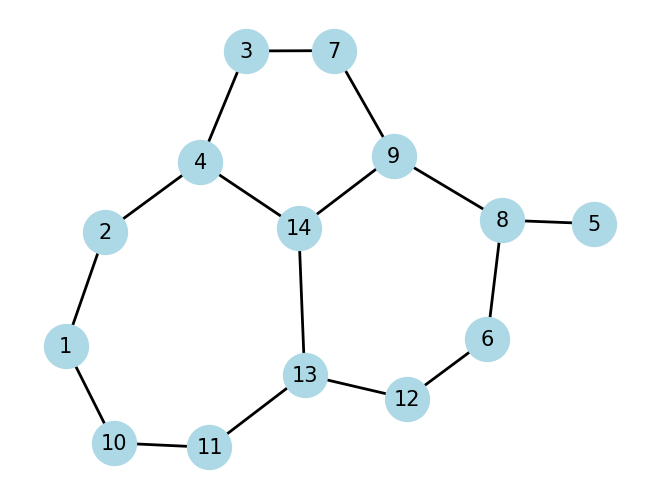

In [5]:
def printGrafo():
    # Crear un grafo dirigido
    G = nx.Graph()
    
    # Añadir nodos
    for node in nodos:
        G.add_node(node)
        
    for i, j in B:
        G.add_edge(i,j)
        
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', width=2, font_size=15)
    plt.show()

printGrafo()


## Modelo Matemático

### Variables del Problema
- $y_{ij}$ variable binaria que representa el *estado de la llave de interconexión* entre i y j, donde esta será 1 si la llave está abierta y 0 si se encuentra cerrada.  
- $P_{ij}$ variable continua que representa el flujo de *potencia activa* entre los nodos $i$ y $j$.
- $Q_{ij}$ variable continua que representa el flujo de *potencia reactiva* entre los nodos $i$ y $j$.
- $I_{ij}$ variable continua que representa el flujo de corriente entre los nodos $i$ y $j$.
- $V_{i}$ variable continua  representa el voltaje en el nodo $i$.


### Parámetros del Problema

- $P_{i}^{D}$ representa la demanda de potencia activa en el nodo $i$ 

- $Q_{i}^{D}$  representa la demanda de potencia  reactiva en el nodo $i$.

- $R_{ij}$ representa la resistencia de la linea entre los nodos $i$ y $j$ 

- $X_{ij}$ representa la reactancia de la linea entre los nodos $i$ y $j$.

## Creación del modelo

Para le modelo $t=1$.

In [30]:
# Create optimization model
m = gp.Model("RSD")
#Constantes

#tolerancia
tol=0.0000001

# b=lo que genera/consume cada nodo
b_v= 0.1

# tension minimima kV
vmin=float(datos_globales.get("vmin"))*float(datos_globales.get("vbase"))

# tension maxima kV
vmax= float(datos_globales.get("vmax"))*float(datos_globales.get("vbase"))

# Potencia base kW
sbase= datos_globales.get("sbase")/0.8

print(vmin, vmax)
# Variables
# Estado de la llave del arco i y j
y =  m.addVars(nodos, nodos,  vtype=GRB.BINARY, name="y")

# Flujo de potencia activa entre los nodos i y j 
P =  m.addVars(nodos,nodos, vtype=GRB.CONTINUOUS, name="P")

# Flujo de potencia reactiva entre los nodos i y j 
Q = m.addVars(nodos,nodos,  vtype=GRB.CONTINUOUS, name="Q")

# Flujo de Corriente entre los nodos i y j
I = m.addVars(nodos,nodos,  vtype=GRB.CONTINUOUS, name="I")

# Raiz cuadrada del flujo de Corriente entre los nodos i y j
Isqrt = m.addVars(nodos,nodos,  vtype=GRB.CONTINUOUS, name="Isqrt")

# Voltaje del nodo i
V = m.addVars(nodos,  vtype=GRB.CONTINUOUS, lb=vmin, ub=vmax, name="V")

# Raiz cuadrada del voltaje del nodo i
Vsqrt = m.addVars(nodos, vtype=GRB.CONTINUOUS, name="Vsqrt")

# Delta del V
deltaV= m.addVars(nodos,nodos,  vtype=GRB.CONTINUOUS, name="deltaV")


21.39 24.150000000000002


In [31]:
for (i, j) in B:
    m.addConstr(Isqrt[i, j] * Isqrt[i, j] == I[i, j], name=f"sqrt_constraint_I_{i}_{j}")

In [32]:
for i in nodos:
    m.addConstr(Vsqrt[i] * Vsqrt[i] == V[i], name=f"sqrt_constraint_V_{i}_{j}")

In [33]:
m.update()

### Función Objetivo

$$
Min \sum\limits_{ij \in {B}} {{R_{ij}}I_{ij}^{sqr}};
$$


In [34]:
FO = LinExpr()
for (i, j) in B:
    FO += Isqrt[i,j] * r[i, j]*y[i,j]

m.setObjective(FO, GRB.MINIMIZE)
    

### Restricciones del problema

1. Equilibrio de potencia activa: esta restricción regula que la cantidad total de potencia activa que es consumida en el sistema eléctrico sea igual a la generada y entregada al sistema, además debe ser igual a la demandada del nodo. 

$$
\sum\limits_{ki \in {B}} {{P_{ki}}}   - \sum\limits_{ij \in {B}} {\left( {{P_{ij}} + {R_{ij}}I_{ij}^{sqr}} \right)} + P_{i,t}^S = P_{i,t}^D;\forall i \in {N}
$$

In [35]:
for i in nodos:
    
    expr1 =0
    expr2 =0
    for k in nodos:
        if ((k,i) in B):
            expr1+=(P[k, i])
    
    for j in nodos:
        if ((i,j) in B):
            expr2+= P[i, j] + r[i, j] * Isqrt[i, j]
    
    
    r1 = expr1 - expr2 + sbase
    
    
    m.addConstr(r1 == pd[i], name=f"demanda potencia activa _{i}")


2. Equilibrio de potencia reactiva: permite que la cantidad total de potencia reactiva que es consumida en el sistema eléctrico sea igual a la generada y entregada al sistema y debe igualar la demanda del nodo.

$$
\sum\limits_{ki \in {B}} {{Q_{ki,t}}}   - \sum\limits_{ij \in {B}} {\left( {{Q_{ij,t}} + {X_{ij}}I_{ij,t}^{sqr}} \right)}  + Q_{i,t}^S= Q_{i,t}^D;\forall i \in {N},    \forall t \in {T}
$$ 

In [36]:
for i in nodos:
    
    expr1 =0
    expr2 =0
    for k in nodos:
        if ((k,i) in B):
            expr1+=(Q[k, i])
    
    for j in nodos:
        if ((i,j) in B):
            expr2+= Q[i, j] + x[i, j] * Isqrt[i, j]
    

    r1 = expr1 - expr2 + sbase
    

    m.addConstr(r1 == qd[i], name=f"demanda potencia reactiva _{i}")


3. Restricción del limite de la magnitud de tensión. El voltaje debe encontrarse entre un rango especifico. 

$$
{V_{i,t}^{sqr} = V_{j,t}^{sqr} + 2\left( {{R_{ij}}{P_{ij,t}} + {X_{ij}}{Q_{ij,t}}} \right)}- Z_{ij}^2{I_{ij,t}^{sqr}} + \Delta_{ij,t}^{V}; \forall ij \in {B},  \forall  t \in {T}
$$

$$
{V_{i}^{sqr} = V_{j}^{sqr} + 2\left( {{R_{ij}}{P_{ij}} + {X_{ij}}{Q_{ij}}} \right)}- (x_{ij}^2+r_{i,j}^2){I_{ij}^{sqr}} + \Delta_{ij}^{V}; \forall ij \in {B}
$$

$Z_{i,j}=x_{ij}^2+r_{i,j}^2$

In [37]:
for i,j in B: 
    expr1= 2*(P[(i, j)] * r[i,j] +Q[(i, j)] *x[i,j])
    expr2= (x[i,j]**2 + r[i,j]**2) *Isqrt[i,j]
    r3= Vsqrt[(j)] + expr1 - expr2 + deltaV[i,j]
    
    m.addConstr(Vsqrt[i]==r3,name=f"limite de magnitud de tensión")
    


4. Restricción que permite regular la magnitud de tensión entre los nodos del sistema con respecto al estado de conexión/desconexión de las llaves de interconexión entre los nodos. 

$$
- {b^V}( {1 - {y_{ij}^B}}) \le \Delta _{ij}^V \le {b^V}( {1 -  {y_{ij}^B}});\forall ij \in B
$$
b= lo que genera/consume cada nodo


In [38]:
for (i,j) in B: 
    expr1= -b_v *(1 - y[i, j])
    m.addConstr(expr1 <= deltaV[(i, j)] ,name=f"regular la magnitud minima de tensión entre los nodos del sistema con respecto a las llaves")
    expr2 = b_v * (1 - y[i, j])
    m.addConstr(deltaV[(i, j)]<= expr2,name=f"regular la magnitud maxima de tensión entre los nodos del sistema con respecto a las llaves")

   

5. Restricción que permite que se sigan las leyes de la conservación de energía en el sistema eléctrico y tiene en cuenta la relación entre las magnitudes de tensión, corriente y potencias activas y reactivas
$$
V_{j}^{sqr} I_{ij}^{sqr} = P_{ij}^2 +  Q_{ij}^2;\forall ij \in {B}
$$

Esta se debe de linealizar, para lograr que sea una restricción optima de LP

In [39]:
for (i,j) in B:
    m.addConstr(Vsqrt[j] * Isqrt[i, j] == P[i, j] * P[i, j] + Q[i, j] * Q[i, j],
                    name=f"restriccion_cuadratica_{i}_{j}")

6. Conservación de potencia en el sistema eléctrico. 

$$
{ {\underline V }^2} \le V_{i}^{sqr} \le {\overline V }^2;\forall i \in N
$$

In [40]:
for i in nodos:
    m.addConstr(vmin**2<= Vsqrt[i], name =f" Conservación_minima_de_potencia_{i}")
    m.addConstr(Vsqrt[i]<=vmax**2, name =f" Conservación_maxima_de_potencia_{i}")

7. Límites al cuadrado de la magnitud de la corriente entre los nodos i y j cuando la llave de interconexión se encuentre abierta. 

$$
0 \le I_{ij}^{sqr} \le \overline I_{ij}^2 y_{ij}^B;\forall ij \in {B}
$$

$  \overline I_{ij} = V_{max} / R_{i,j}$


In [41]:
for (i,j) in B:
    m.addConstr(0<=Isqrt[i,j], name=f"magnitud_minima_Corriente_{i}_{j}")
    m.addConstr(Isqrt[i,j]<= (vmax/r[i,j])**2*y[i,j], name=f"magnitud_maxima_Corriente_{i}_{j}")
    

8. Restricción de la variable de estado de funcionamiento de los interruptores de interconexión $y_{ij,t}^B$.

$$
y_{ij,t}^B \in \left\{ {0,1} \right\};\forall ij \in {B}, \forall t \in {T}
$$

In [42]:
for (i,j) in B:
    m.addConstr((y[i,j]+y[j,i])<=1, name=f"solo_una_una_direccion_de_flujo_entre_los_nodos_{i}_{j}")

9. Restricción de radialidad

$$\sum_{ij \in B}{ y_{ij,t}^B} = |N|- |N_{sub}|$$

Para le caso Nsub= 1, entonces

$$\sum_{ij \in B}{ y_{ij,t}^B} = |N|- 1$$


In [43]:
print(nodos)
print(len(nodos))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
14


In [44]:
valor=0

for (i,j) in B:
    valor+=y[i,j]
    
m.addConstr(valor ==len(nodos)-1, name=f"Restriccione_de_radialidad")

<gurobi.Constr *Awaiting Model Update*>

In [45]:
m.update()

In [46]:
m.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i5-1240P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 249 rows, 1204 columns and 732 nonzeros
Model fingerprint: 0x7ebdd468
Model has 32 quadratic objective terms
Model has 78 quadratic constraints
Variable types: 1008 continuous, 196 integer (196 binary)
Coefficient statistics:
  Matrix range     [3e-03, 4e+05]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-02, 2e-01]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e-01, 1e+05]
Presolve removed 78 rows and 984 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 0

Model is infeasible or unbounded
Best objective -, best bound -, gap -


In [47]:
m.computeIIS()

IIS computation: initial model status unknown, solving to determine model status
Presolve removed 78 rows and 984 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

Computing Irreducible Inconsistent Subsystem (IIS)...

           Constraints          |            Bounds           |  Runtime
      Min       Max     Guess   |   Min       Max     Guess   |
--------------------------------------------------------------------------
        0       327         -         0      1022         -           0s
       50        50        50        64        64        64           0s

IIS computed: 50 constraints, 64 bounds
IIS runtime: 0.17 seconds (0.06 work units)


In [48]:
if m.Status == GRB.INFEASIBLE:
    m.computeIIS()
    m.write('iismodel.ilp')


IIS computed: 50 constraints, 64 bounds
IIS runtime: 0.00 seconds (0.00 work units)


In [49]:
# Print out the IIS constraints and variables
print('\nThe following constraints and variables are in the IIS:')
for c in m.getConstrs():
    if c.IISConstr: 
        print(f'\t{c.constrname}: {m.getRow(c)} {c.Sense} {c.RHS}')


for v in m.getVars():

    if v.IISLB: print(f'\t{v.varname} ≥ {v.LB}')
    if v.IISUB: print(f'\t{v.varname} ≤ {v.UB}')


The following constraints and variables are in the IIS:
	demanda potencia activa _1: -1.0 P[1,2] + -1.0 P[1,10] + P[2,1] + P[10,1] + -0.04 Isqrt[1,2] + -0.09 Isqrt[1,10] = -122900.0
	demanda potencia activa _2: P[1,2] + -1.0 P[2,1] + -1.0 P[2,4] + P[4,2] + -0.04 Isqrt[2,1] + -0.08 Isqrt[2,4] = -124000.0
	demanda potencia activa _3: -1.0 P[3,4] + -1.0 P[3,7] + P[4,3] + P[7,3] + -0.09 Isqrt[3,4] + -0.04 Isqrt[3,7] = -124000.0
	demanda potencia activa _4: P[2,4] + P[3,4] + -1.0 P[4,2] + -1.0 P[4,3] + -1.0 P[4,14] + P[14,4] + -0.08 Isqrt[4,2] + -0.09 Isqrt[4,3] + -0.11 Isqrt[4,14] = -124000.0
	demanda potencia activa _5: -1.0 P[5,8] + P[8,5] + -0.08 Isqrt[5,8] = -120500.0
	demanda potencia activa _6: -1.0 P[6,8] + -1.0 P[6,12] + P[8,6] + P[12,6] + -0.11 Isqrt[6,8] + -0.04 Isqrt[6,12] = -124400.0
	demanda potencia activa _7: P[3,7] + -1.0 P[7,3] + -1.0 P[7,9] + P[9,7] + -0.04 Isqrt[7,3] + -0.11 Isqrt[7,9] = -124000.0
	demanda potencia activa _8: P[5,8] + P[6,8] + -1.0 P[8,5] + -1.0 P[8,6] 